#Library

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


#EDA

In [109]:
BKR = pd.read_csv('/content/BKRdata.csv')
BP = pd.read_csv('/content/BPdata.csv')
COP = pd.read_csv('/content/COPdata.csv')
CVX = pd.read_csv('/content/CVXdata.csv')
E = pd.read_csv('/content/Edata.csv')
HAL = pd.read_csv('/content/HALdata.csv')
SLB = pd.read_csv('/content/SLBdata.csv')
XOM = pd.read_csv('/content/XOM_data.csv')

In [110]:
df = pd.concat([BKR,BP,COP,CVX,E,HAL,SLB,XOM])

In [111]:
"""df = pd.read_csv('/content/TSLA_data.csv')
df.head()"""

"df = pd.read_csv('/content/TSLA_data.csv')\ndf.head()"

In [112]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,8448.000000,8448.000000,8448.000000,8448.000000,8.448000e+03,8448.000000,8448.0
mean,35.290538,35.773306,34.798070,35.288607,1.086692e+07,0.006617,0.0
std,21.501333,21.806965,21.225318,21.526757,8.569641e+06,0.063095,0.0
min,4.613647,5.154158,4.102091,4.449563,0.000000e+00,0.000000,0.0
25%,21.954129,22.264798,21.654869,21.968952,5.914450e+06,0.000000,0.0
50%,29.004846,29.381482,28.550788,28.954928,9.315500e+06,0.000000,0.0
75%,38.514555,39.185994,37.759852,38.482543,1.389358e+07,0.000000,0.0
max,135.031052,136.499643,130.877140,133.000656,8.614800e+07,1.400000,0.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8448 entries, 0 to 1055
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8448 non-null   object 
 1   Open          8448 non-null   float64
 2   High          8448 non-null   float64
 3   Low           8448 non-null   float64
 4   Close         8448 non-null   float64
 5   Volume        8448 non-null   int64  
 6   Dividends     8448 non-null   float64
 7   Stock Splits  8448 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 594.0+ KB


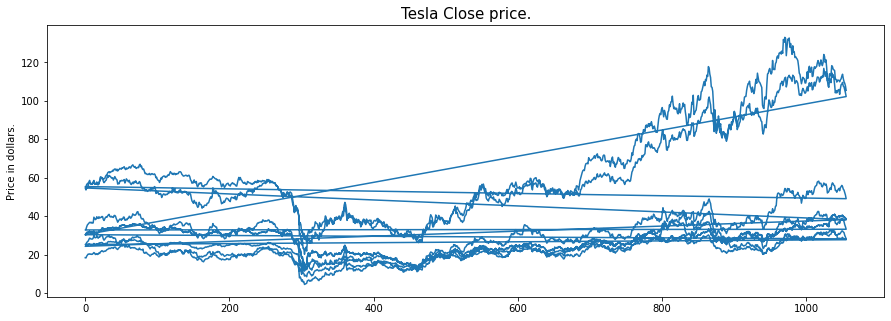

In [114]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [115]:
#df[df['Close'] == df['Adj Close']].shape

In [116]:
df.shape

(8448, 8)

In [117]:
#df[df['Close'] == df['Adj Close']].shape

In [118]:
#df = df.drop(['Adj Close'], axis=1)

In [119]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

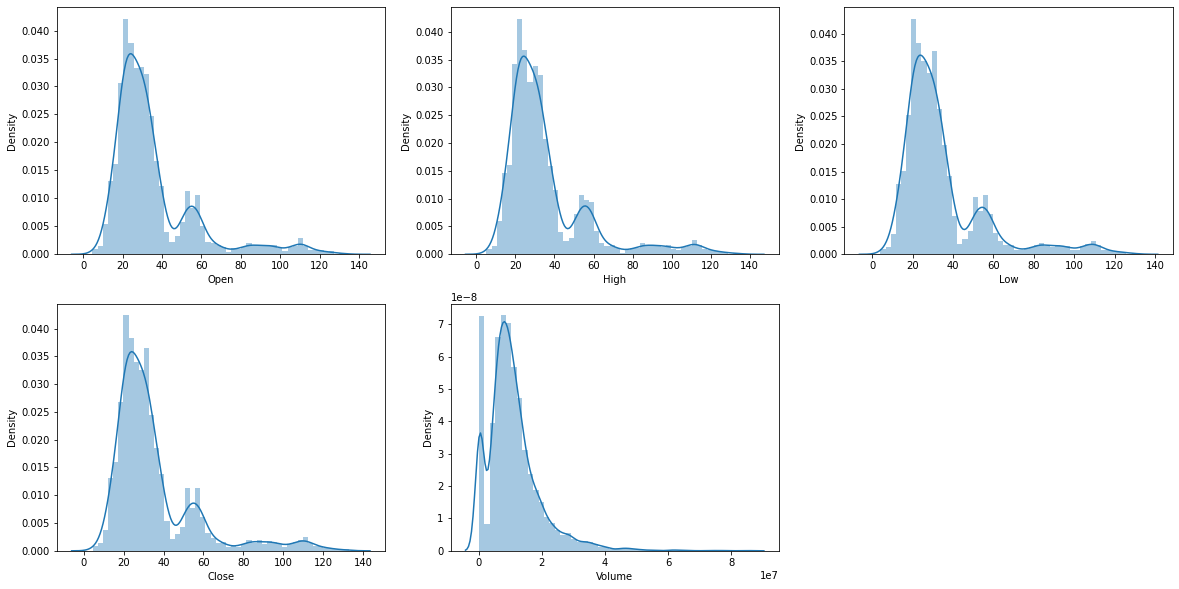

In [120]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

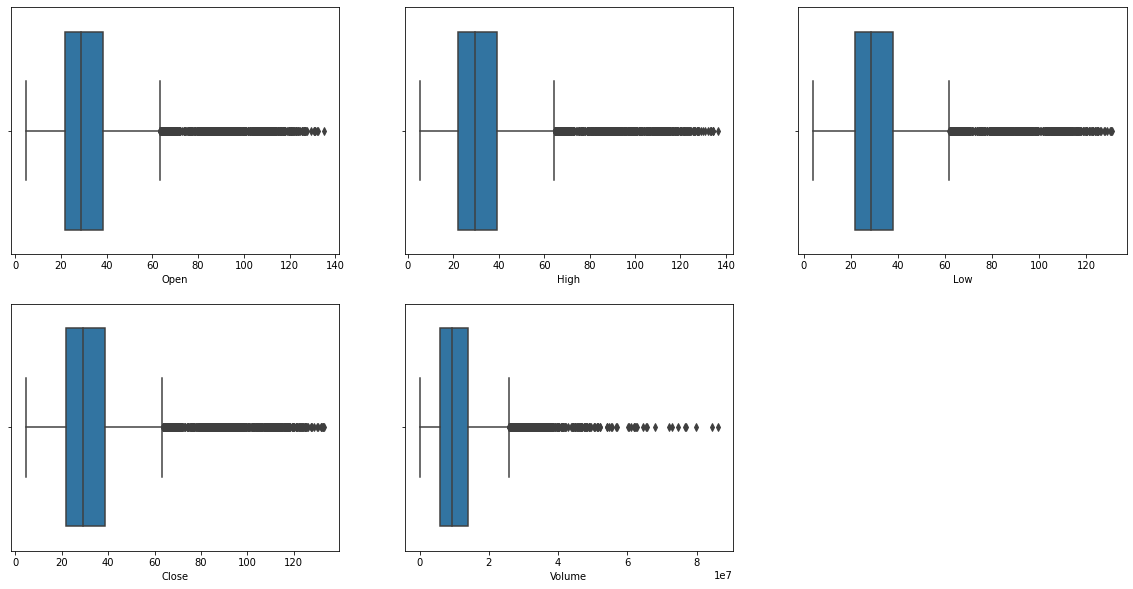

In [121]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

#Feature Engineering

In [122]:
"""splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')"""

df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,month,year
0,2019-01-02 05:00:00+00:00,18.484916,18.868745,18.179596,18.362787,7150000,0.0,0.0,2,1,2019
1,2019-01-03 05:00:00+00:00,18.397676,18.624485,17.917889,18.240654,6672900,0.0,0.0,3,1,2019
2,2019-01-04 05:00:00+00:00,18.615764,19.296190,18.554700,19.156614,5040400,0.0,0.0,4,1,2019
3,2019-01-07 05:00:00+00:00,19.139168,19.845764,19.034486,19.671295,4740000,0.0,0.0,7,1,2019
4,2019-01-08 05:00:00+00:00,19.915553,20.299383,19.749807,20.247042,4959100,0.0,0.0,8,1,2019


In [123]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,month,year,is_quarter_end
0,2019-01-02 05:00:00+00:00,18.484916,18.868745,18.179596,18.362787,7150000,0.0,0.0,2,1,2019,0
1,2019-01-03 05:00:00+00:00,18.397676,18.624485,17.917889,18.240654,6672900,0.0,0.0,3,1,2019,0
2,2019-01-04 05:00:00+00:00,18.615764,19.296190,18.554700,19.156614,5040400,0.0,0.0,4,1,2019,0
3,2019-01-07 05:00:00+00:00,19.139168,19.845764,19.034486,19.671295,4740000,0.0,0.0,7,1,2019,0
4,2019-01-08 05:00:00+00:00,19.915553,20.299383,19.749807,20.247042,4959100,0.0,0.0,8,1,2019,0


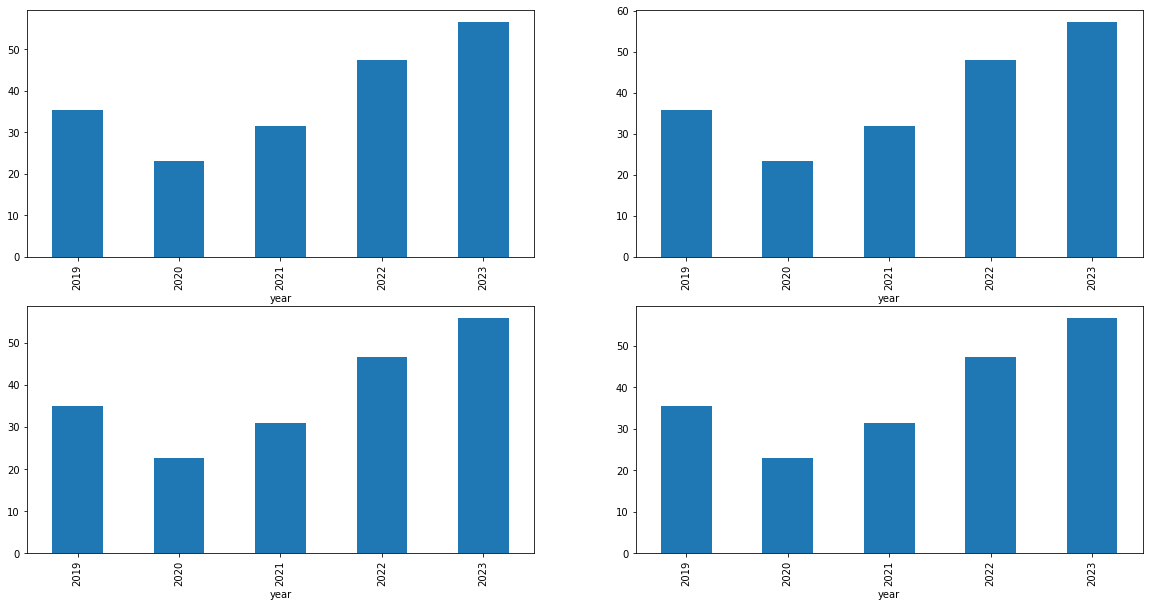

In [124]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [125]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,month,year
is_quarter_end,,,,,,,,,,
0,35.390182,35.870874,34.912385,35.407583,1.055118e+07,0.008171,0.0,15.680398,5.836648,2020.626420
1,35.091251,35.578169,34.569440,35.050655,1.149839e+07,0.003510,0.0,15.491477,7.338068,2020.582386


In [126]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

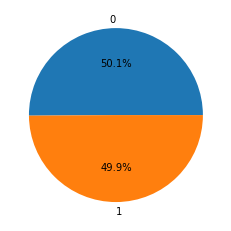

In [127]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

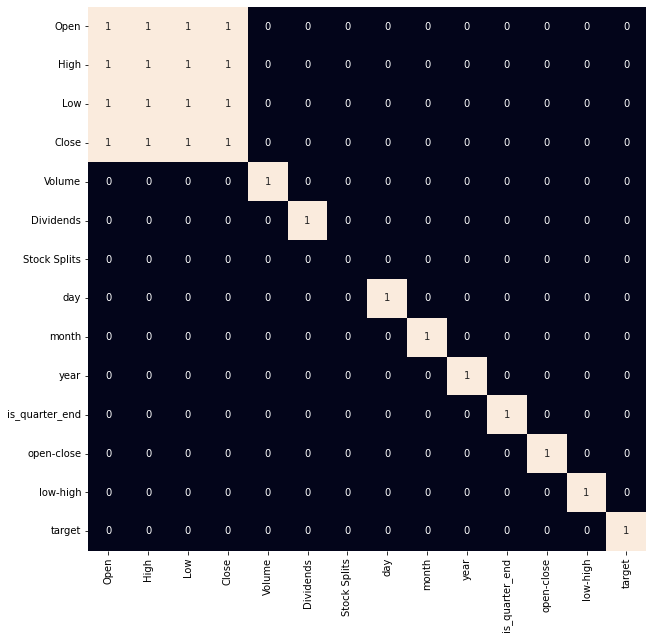

In [128]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [129]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(
	features, target, test_size=0.3, random_state=43)
print(x_train.shape, x_test.shape)


(5913, 3) (2535, 3)


#Modeling

##Logistic Regression

In [130]:
LRModel = LogisticRegression()
LRModel.fit(x_train, y_train)

LogisticRegression()

In [131]:
yval_predict = cross_val_predict(estimator = LRModel, X = x_train, y = y_train, cv = 10)

In [132]:
print(classification_report(y_train, yval_predict))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      2944
           1       0.50      0.49      0.49      2969

    accuracy                           0.50      5913
   macro avg       0.50      0.50      0.50      5913
weighted avg       0.50      0.50      0.50      5913



In [133]:
ytest_predict = LRModel.predict(x_test)
print("Classification Report: \n",classification_report(y_test, ytest_predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.54      0.53      1271
           1       0.52      0.50      0.51      1264

    accuracy                           0.52      2535
   macro avg       0.52      0.52      0.52      2535
weighted avg       0.52      0.52      0.52      2535



##SVM

In [134]:
SVMModel = SVC(kernel='poly', probability=True)
SVMModel.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [135]:
yval_predict = cross_val_predict(estimator = SVMModel, X = x_train, y = y_train, cv = 10)

In [136]:
print(classification_report(y_train, yval_predict))

              precision    recall  f1-score   support

           0       0.49      0.44      0.46      2944
           1       0.49      0.55      0.52      2969

    accuracy                           0.49      5913
   macro avg       0.49      0.49      0.49      5913
weighted avg       0.49      0.49      0.49      5913



In [137]:
ytest_predict = SVMModel.predict(x_test)
print("Classification Report: \n",classification_report(y_test, ytest_predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.66      0.57      1271
           1       0.49      0.32      0.39      1264

    accuracy                           0.49      2535
   macro avg       0.49      0.49      0.48      2535
weighted avg       0.49      0.49      0.48      2535



##XGBoost

In [138]:
XGBModel = XGBClassifier()
XGBModel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [139]:
yval_predict = cross_val_predict(estimator = XGBModel, X = x_train, y = y_train, cv = 10)

In [140]:
print(classification_report(y_train, yval_predict))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      2944
           1       0.55      0.56      0.56      2969

    accuracy                           0.55      5913
   macro avg       0.55      0.55      0.55      5913
weighted avg       0.55      0.55      0.55      5913



In [141]:
ytest_predict = XGBModel.predict(x_test)
print("Classification Report: \n",classification_report(y_test, ytest_predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.55      0.55      1271
           1       0.55      0.57      0.56      1264

    accuracy                           0.56      2535
   macro avg       0.56      0.56      0.56      2535
weighted avg       0.56      0.56      0.56      2535



##Random Forest

In [143]:
RFModel = RandomForestClassifier()
RFModel.fit(x_train, y_train)

RandomForestClassifier()

In [144]:
yval_predict = cross_val_predict(estimator = RFModel, X = x_train, y = y_train, cv = 10)

In [145]:
print(classification_report(y_train, yval_predict))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      2944
           1       0.58      0.58      0.58      2969

    accuracy                           0.58      5913
   macro avg       0.58      0.58      0.58      5913
weighted avg       0.58      0.58      0.58      5913



In [146]:
ytest_predict = RFModel.predict(x_test)
print("Classification Report: \n",classification_report(y_test, ytest_predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60      1271
           1       0.60      0.60      0.60      1264

    accuracy                           0.60      2535
   macro avg       0.60      0.60      0.60      2535
weighted avg       0.60      0.60      0.60      2535



##Adaboost

In [147]:
AdaBoostModel = AdaBoostClassifier()
AdaBoostModel.fit(x_train, y_train)

AdaBoostClassifier()

In [151]:
yval_predict = cross_val_predict(estimator = AdaBoostModel, X = x_train, y = y_train, cv = 10)

In [152]:
print(classification_report(y_train, yval_predict))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49      2944
           1       0.49      0.49      0.49      2969

    accuracy                           0.49      5913
   macro avg       0.49      0.49      0.49      5913
weighted avg       0.49      0.49      0.49      5913



In [153]:
ytest_predict = AdaBoostModel.predict(x_test)
print("Classification Report: \n",classification_report(y_test, ytest_predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.58      0.54      1271
           1       0.52      0.45      0.48      1264

    accuracy                           0.52      2535
   macro avg       0.52      0.52      0.51      2535
weighted avg       0.52      0.52      0.51      2535



#Hyperparameter Tuning Random Forest

In [154]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [156]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [157]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [158]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [160]:
RFModel = RandomForestClassifier(n_estimators = 1600, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto', 
                                 max_depth = 10, bootstrap = True)
RFModel.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=5,
                       n_estimators=1600)

In [161]:
yval_predict = cross_val_predict(estimator = RFModel, X = x_train, y = y_train, cv = 10)

In [162]:
print(classification_report(y_train, yval_predict))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55      2944
           1       0.55      0.54      0.55      2969

    accuracy                           0.55      5913
   macro avg       0.55      0.55      0.55      5913
weighted avg       0.55      0.55      0.55      5913



In [163]:
ytest_predict = RFModel.predict(x_test)
print("Classification Report: \n",classification_report(y_test, ytest_predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.55      0.56      1271
           1       0.56      0.56      0.56      1264

    accuracy                           0.56      2535
   macro avg       0.56      0.56      0.56      2535
weighted avg       0.56      0.56      0.56      2535



#Save Dataset

In [164]:
df.to_csv('dataset_all.csv')

#Save Model

In [165]:
# Save Model Using Pickle
import pickle
pickle.dump(rf, open("stockPredictModel", 'wb'))